# Gradient Boosting y XGBoost

## ¿Qué es Boosting?

- Técnica de ensamble: combina muchos modelos débiles (árboles poco profundos) para crear un modelo fuerte.
- Diferencia con Bagging:
    - Bagging = Árboles entrenados en paralelo (votan).
    - Boosting = Árboles entrenados en secuencia, cada uno corrige los errores del anterior.

## Gradient Boosting
- Entrena árboles en secuencia usando gradiente descendente para optimizar una función de pérdida.
- Cada nuevo árbol ajusta los residuos (errores) de los árboles previos.
- Parámetros clave:
    - `n_estimators`: n° de árboles.
    - `learning_rate`: cuánto contribuye cada árbol.
    - `max_depth`: profundidad de cada árbol base.
    - `subsample`: % de muestras usadas en cada árbol (para evitar sobreajuste).

## XGBoost (Extreme Gradient Boosting)
- Implementación optimizada de Gradient Boosting.
- Muy usada en competencias Kaggle y problemas tubulares.
- Ventajas:
    - Más rápido (paralelización, optimización de memoria).
    - Regularización adicional (`reg_alpha`, `reg_lambda`).
    - Maneja valores faltantes automáticamente.
- Parámetros clave extra:
    - `gamma`: mínimo gain requerido para hacer split (controla complejidad).
    - `colsample_bytree`: % de features usadas por árbol.
    - `scale_pos_weight`: balance para clases desbalanceadas.

## Ejemplo Wine


=== Gradient Boosting ===
              precision    recall  f1-score   support

     class_0       1.00      0.89      0.94        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54

Matriz de confusión:
 [[16  2  0]
 [ 0 21  0]
 [ 0  0 15]]


c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:51:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Matriz de confusión:
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


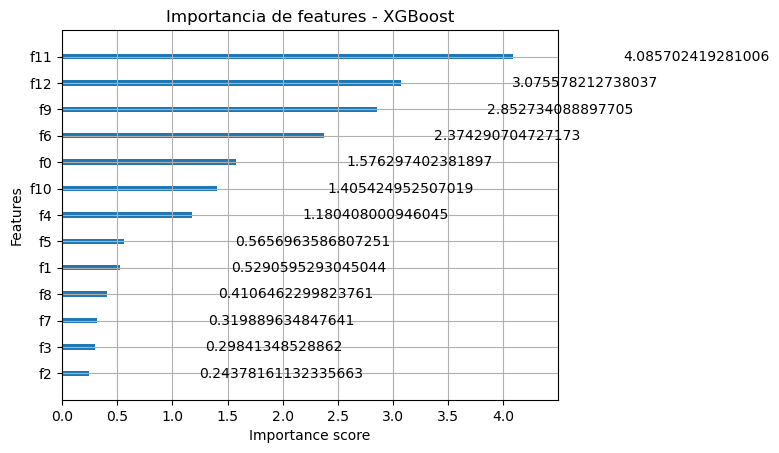

In [8]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# Dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ==========================
# Gradient Boosting
# ==========================
gb = GradientBoostingClassifier(
    n_estimators=100,    # nº de árboles
    learning_rate=0.1,   # contribución de cada árbol
    max_depth=3,         # profundidad de cada árbol
    random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("\n=== Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb, target_names=target_names))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_gb))

# ==========================
# XGBoost
# ==========================
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))

# Importancia de features en XGBoost
xgb.plot_importance(xgb_clf, importance_type="gain")
plt.title("Importancia de features - XGBoost")
plt.show()


## Explicación de los resultados
- Gradient Boosting: suele mejorar frente a AdaBoost porque optimiza gradualmente la función de pérdida.
- XGBoos: mejora aún más, gracias a la regulazación y subsampleo.
- En datasets tabulares como Wine, ambos suelen lograr accuracy > 95%.

## Tarea
1. Usa el dataset Breast Cancer (`load_breast_cancer`).
2. Entrena un GradientBoostingClassifier y in XGBClassifier.
3. Compara:
    - Accuracy y F1.
    - Importacia de features.
4. Explica: 
    - ¿Qué modelo generalizó mejor?
    - ¿Qué features fueron más importantes?


=== Gradient Boosting ===
              precision    recall  f1-score   support

   malignant       0.95      0.89      0.92        64
      benign       0.94      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Matriz de confusión:
 [[ 57   7]
 [  3 104]]

=== XGBoost ===
              precision    recall  f1-score   support

   malignant       0.98      0.92      0.95        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Matriz de confusión:
 [[ 59   5]
 [  1 106]]


c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:15:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


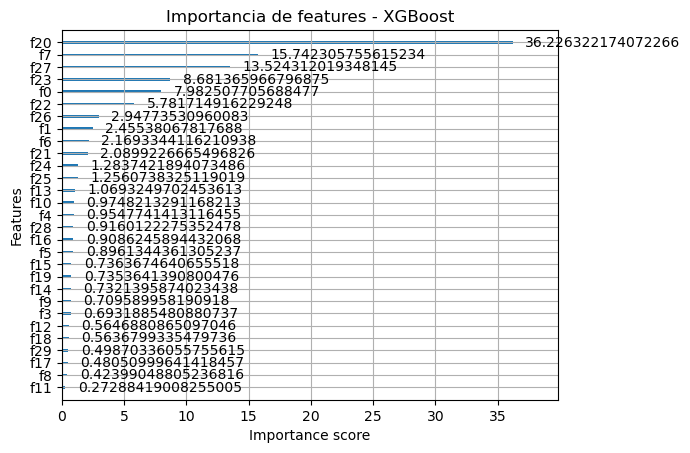

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# 1. Dataset Breast Cancer
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
target_names = breast_cancer.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 2. 
# ==========================
# Gradient Boosting
# ==========================
gb = GradientBoostingClassifier(
    n_estimators=100,    # nº de árboles
    learning_rate=0.1,   # contribución de cada árbol
    max_depth=3,         # profundidad de cada árbol
    random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("\n=== Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb, target_names=target_names))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_gb))

# ==========================
# XGBoost
# ==========================
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))

# Importancia de features en XGBoost
xgb.plot_importance(xgb_clf, importance_type="gain")
plt.title("Importancia de features - XGBoost")
plt.show()


4.
    - XGBoost generalizó mejor
    - f20, f7, f27, f23, f0